# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jakel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!

# Additional Imports for API
from dotenv import load_dotenv
load_dotenv('john.env')                             # load our .env file with all our API keys.

# Scan our .env file for the news_api Key
api_key = os.getenv("news_api")                        

In [3]:
# Test is API key was read-in correctly
type(api_key)

str

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi.newsapi_client import NewsApiClient                    # import NewsAPIClient to make the newsapi client

newsapi = NewsApiClient(api_key=api_key)                            # pass our prevous api_key that has the read-in news_api key

**CODER'S NOTE:** My News_API is grabbing articles from MASHABLE news source, while Solutions code is getting them from ENDGADGET. The number of articles collected from MASHABLE is vastly less than ENGADET. I do not know why both code sets can use the same news_api and somehow get different content pulled in. This means my sentiments and results will be different.

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

btc_articles = newsapi.get_everything(                               # use the .get_everything()
    q='Bitcoin AND bitcoin AND BTC',                                 # set the query param for Bitcoin
    language='en',
    sort_by = 'relevancy'
)

# Show the total number of news
btc_articles['totalResults']                                         # result should be 1876 articles on Bitcoin. This number changes every time you run the cell.

1825

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_articles = newsapi.get_everything(                               # use the .get_everything()
    q='Ethereum AND ethereum AND ETH',                               # set the query param for Ethereum
    language='en',
    sort_by = 'relevancy'
)

eth_articles['totalResults']                                         # display number of articles on Ethereum

818

In [94]:
# CODER'S NOTE: My News API is pulling articles from MASHABLE while Solutions API is pulling from ENGADGET. The number of articles is greatly different. I am using the same news_api like we did in class.
btc_articles

{'status': 'ok',
 'totalResults': 1816,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Sasha Lekach',
   'title': 'Elon Musk says Bitcoin no longer accepted for Tesla purchases',
   'description': 'Tesla CEO Elon Musk has changed his stance on cryptocurrency.\nBack in March, Musk announced Tesla was accepting Bitcoin for its electric cars. Earlier this year the EV company even bought $1.5 billion of the cryptocurrency.\nOn Wednesday afternoon, that all en…',
   'url': 'https://mashable.com/article/elon-musk-tesla-suspends-bitcoin/',
   'urlToImage': 'https://mondrian.mashable.com/2021%252F05%252F12%252F75%252Fea0b34fd9c0d4ba0827daf209266fda7.7a421.jpg%252F1200x630.jpg?signature=mUM9URJ4N2wk_HmXxVecSZacv00=',
   'publishedAt': '2021-05-12T23:33:07Z',
   'content': 'Tesla CEO Elon Musk has changed his stance on cryptocurrency.\r\nBack in March, Musk announced Tesla was accepting Bitcoin for its electric cars. Earlier this year the EV company even bought $1

In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

btc_sentiments = []                                    # create a list to append articles and scores as we loop, and will make a DataFrame out of. 

# Loop through the BTC articles pulled from the newsapi get everything()

for article in btc_articles['articles']:               # NOTE: my NewsAPI gives me a complex nested dictionary structure for the articles unlike Solutions code. Cannot easily loop by
                                                       # just for article in btc_articles alone. 
    try:
        text = article['content']   # CODER'S NOTE: I kept getting TypeErrors when running this line, so I had to modify my for-structure 
        
        #VADER sentiment analyzer
        sentiment = analyzer.polarity_scores(text)                 
        
        # set the polarity scores that our VADER analyzer wil use to score the text.
        compound = sentiment['compound']
        positive = sentiment['pos']
        negative = sentiment['neg']
        neutral = sentiment['neu']
        
        # append our sentiments and scores to our btc_sentiments list using a dict.
        btc_sentiments.append({
            'text' : text,
            #'date' : date,
            'compound' : compound,
            'positive' : positive,
            'negative' : negative,
            'neutral' : neutral
        })
    except AttributeError:            # I originally used TypeError for my except to solve the issue, but then it didn't append anything to btc_Sentiments.
        pass

In [8]:
# Store all the Bitcoin sentiments into a DataFrame

btc_df = pd.DataFrame(
    btc_sentiments
)
btc_df.head()

,text,compound,positive,negative,neutral
0,Tesla CEO Elon Musk has changed his stance on ...,0.3818,0.071,0.000,0.929
1,That love affair between Elon Musk and Bitcoin...,0.7322,0.162,0.000,0.838
2,An Australian computer scientist who alleges h...,0.5994,0.213,0.052,0.736
3,"Bitcoin rebounded to about $50,000 in Asian tr...",0.1779,0.069,0.051,0.880
4,The price of Bitcoin fell as much as 29% Wedne...,-0.7506,0.000,0.203,0.797


In [9]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

eth_sentiments = []    # empty list to store ethereum sentiments and scores.

for article in eth_articles['articles']:               # CODER'S NOTE: This cell kept returning an TYPE error given the next line 
    try:
        text = article['content']
        
        sentiment = analyzer.polarity_scores(text)       # Using the VADER sentiment polarity analyzer on the text content.          
        
        # set the polarity scores that our VADER analyzer wil use to score the text.
        compound = sentiment['compound']
        positive = sentiment['pos']
        negative = sentiment['neg']
        neutral = sentiment['neu']
        
        # append our sentiments and scores to our btc_sentiments list using a dict.
        eth_sentiments.append({
            'text' : text,
            #'date' : date,
            'compound' : compound,
            'positive' : positive,
            'negative' : negative,
            'neutral' : neutral
        })
    except AttributeError:
        pass

In [10]:
# Store all the Ethereum sentiments into a DataFrame

eth_df = pd.DataFrame(
    eth_sentiments,
)
eth_df.head()

,text,compound,positive,negative,neutral
0,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.0,0.940
1,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.0,0.909
2,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.0,0.917
3,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.0,1.000
4,Bitcoin vs. Ethereum\r\nGetty Images AsiaPac\r...,0.6423,0.149,0.0,0.851


In [11]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.052330,0.076800,0.065250,0.858000
std,0.464020,0.069485,0.065069,0.072762
min,-0.750600,0.000000,0.000000,0.728000
25%,-0.272800,0.000000,0.000000,0.812500
50%,0.165500,0.073000,0.057000,0.856500
75%,0.386825,0.134250,0.095500,0.917750
max,0.732200,0.213000,0.203000,1.000000


In [12]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.00000,20.000000,20.000000,20.000000
mean,0.18454,0.068300,0.016800,0.914900
std,0.29820,0.064925,0.036263,0.070658
min,-0.40190,0.000000,0.000000,0.766000
25%,0.00000,0.000000,0.000000,0.868750
50%,0.19010,0.070000,0.000000,0.920500
75%,0.40190,0.095500,0.000000,0.965500
max,0.64860,0.227000,0.125000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

**A: From these results, Bitcoin with a mean positive score of .0768 vs Ethereum with .068**

Q: Which coin had the highest compound score?

**A: I'm assuming we're looking at the 'max' row. Bitcoin had highest max compound score was .7322 while Ethereum is .6486, or .65**

Q. Which coin had the highest positive score?

**A: Ethereum with a max positive score of .227 while Bitcoin has a positive score of .213**

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

lmt = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

sw = set(stopwords.words('english'))

# Adding to stopwords list

sw_addons = {'ha', 'known', 'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'yet', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', }

In [15]:
# Complete the tokenizer function
def tokenizer(text):                                   # btc_sentiments list [] 
    """Tokenizes text."""
    
    # Remove the punctuation from text
    
    regex = re.compile('[^a-zA-Z ]')               # set a regex object. anything not a-z,A-Z, or a space, is flagged to be stripped out of article.
    re_clean = regex.sub('', text)                 # strip out all the useless non-letter charaters and replace it with a blank.

   
    # Create a tokenized list of the words
    
    words = word_tokenize(re_clean)                   # tokenize the words that were cleaned by the regex eliminating punctuation symbols
    
    # Lemmatize words into root words

    lem = [lmt.lemmatize(word) for word in words]      # loop through all the cleaned tokenized words, and transform words into their simplsitc singular form.
   
     
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]          # set tokens from the cleaned lemmatized tokenized words that are NOT stopwords. 
                                                                                                # we union the imported stopword list with our own list of stopwords too.
    return tokens

In [14]:
# CODER'S NOTE: This cell will not run. Had to use Solution code for this part to get the df to add the column of tokenized words. 
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_words = tokenizer(btc_sentiments)                   # very simply call-line statement passing our cleaned btc_sentiments to our tokenizer fucntion to tokenize the words
btc_df['tokenized'] = btc_words                         # add a new column to btc_df called 'tokenized' and assign this column the 
btc_df.head()

# CODE FAILS this code should logically work! And it is not working. The tutoring session could not de-bug it. 
# Very simple python cell, just calling a function and passing our gathered sentiments to be tokenized. No reason for it to fail. 

ValueError: Length of values (517) does not match length of index (20)

In [16]:
# Solutions code 
# We did not do anything like this in class

btc_df['tokenized'] = btc_df.text.apply(tokenizer)            
btc_df.head()

# adds a new column caled tokenized to btc_df
# the value stored is the returned tokenized words from the tokenizer. 
# we are assigning the btc_df, and then stripping out the text portion of the dataframe and applying the tokenizer() function to tokenize the text and return it back to be stored.

,text,compound,positive,negative,neutral,tokenized
0,Tesla CEO Elon Musk has changed his stance on ...,0.3818,0.071,0.000,0.929,"[tesla, ceo, elon, musk, changed, stance, cryp..."
1,That love affair between Elon Musk and Bitcoin...,0.7322,0.162,0.000,0.838,"[love, affair, elon, musk, bitcoin, become, co..."
2,An Australian computer scientist who alleges h...,0.5994,0.213,0.052,0.736,"[australian, computer, scientist, alleges, cre..."
3,"Bitcoin rebounded to about $50,000 in Asian tr...",0.1779,0.069,0.051,0.880,"[bitcoin, rebounded, asian, trading, thursday,..."
4,The price of Bitcoin fell as much as 29% Wedne...,-0.7506,0.000,0.203,0.797,"[price, bitcoin, fell, much, wednesday, china,..."


In [17]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df['tokenized'] = eth_df.text.apply(tokenizer)
eth_df.head()

,text,compound,positive,negative,neutral,tokenized
0,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.0,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.0,0.909,"[creator, behind, cryptopunks, one, popular, n..."
2,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.0,0.917,"[solana, isnt, outside, crypto, community, ins..."
3,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.0,1.000,"[illustration, alex, castro, verge, cryptocurr..."
4,Bitcoin vs. Ethereum\r\nGetty Images AsiaPac\r...,0.6423,0.149,0.0,0.851,"[bitcoin, v, ethereumgetty, images, asiapacbit..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_bigrams = ngrams(                                                   # executute the ngrams() function
    tokenizer(btc_df.text.str.cat()),                                   # pass a call line to the tokenizer() function, pass the dataframe btc_df and strip out just the text to pass to function
    n=2                                                                 # set n param to 2 for bigrams. 
)
Counter(btc_bigrams)                                                     # runs Counter on all the bigrams in the btc_df

Counter({('tesla', 'ceo'): 2,
         ('ceo', 'elon'): 2,
         ('elon', 'musk'): 6,
         ('musk', 'changed'): 1,
         ('changed', 'stance'): 1,
         ('stance', 'cryptocurrencyback'): 1,
         ('cryptocurrencyback', 'march'): 1,
         ('march', 'musk'): 1,
         ('musk', 'tesla'): 1,
         ('tesla', 'wa'): 1,
         ('wa', 'accepting'): 1,
         ('accepting', 'bitcoin'): 2,
         ('bitcoin', 'electric'): 1,
         ('electric', 'car'): 2,
         ('car', 'earlier'): 1,
         ('earlier', 'year'): 1,
         ('year', 'ev'): 1,
         ('ev', 'company'): 1,
         ('company', 'even'): 1,
         ('even', 'bought'): 1,
         ('bought', 'billi'): 1,
         ('billi', 'charsthat'): 1,
         ('charsthat', 'love'): 1,
         ('love', 'affair'): 1,
         ('affair', 'elon'): 1,
         ('musk', 'bitcoin'): 1,
         ('bitcoin', 'become'): 1,
         ('become', 'complicatedits'): 1,
         ('complicatedits', 'rough'): 1,
         ('r

In [20]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_bigrams = ngrams(tokenizer(eth_df.text.str.cat()), n=2)
Counter(eth_bigrams)

Counter({('vitalik', 'buterin'): 2,
         ('buterin', 'creator'): 1,
         ('creator', 'ethereum'): 1,
         ('ethereum', 'wednesday'): 1,
         ('wednesday', 'donated'): 1,
         ('donated', 'ethereum'): 1,
         ('ethereum', 'meme'): 1,
         ('meme', 'coin'): 1,
         ('coin', 'worth'): 1,
         ('worth', 'billion'): 1,
         ('billion', 'one'): 1,
         ('one', 'largestever'): 1,
         ('largestever', 'individual'): 1,
         ('individual', 'philanthropy'): 1,
         ('philanthropy', 'effortsbuterin'): 1,
         ('effortsbuterin', 'transferred'): 1,
         ('transferred', 'eth'): 1,
         ('eth', 'charsthe'): 1,
         ('charsthe', 'creator'): 1,
         ('creator', 'behind'): 1,
         ('behind', 'cryptopunks'): 1,
         ('cryptopunks', 'one'): 1,
         ('one', 'popular'): 1,
         ('popular', 'nft'): 1,
         ('nft', 'project'): 1,
         ('project', 'web'): 1,
         ('web', 'revealed'): 1,
         ('revealed',

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):           # what kind of function param is N=3? How do you pass an expression as a param into a function? You should already define equality for a param before passing it. 
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

btc_tokenized_words = tokenizer(btc_df.text.str.cat())
btc_top_10 = token_count(btc_tokenized_words, 10)
print(dict(btc_top_10))

{'bitcoin': 19, 'elon': 7, 'musk': 7, 'tesla': 5, 'crypto': 5, 'day': 4, 'charsbitcoin': 4, 'digital': 4, 'cryptocurrency': 4, 'year': 3}


In [24]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

eth_tokenized_words = tokenizer(eth_df.text.str.cat())
eth_top_10 = token_count(eth_tokenized_words, 10)
print(dict(eth_top_10))

{'ethereum': 6, 'crypto': 6, 'blockchain': 6, 'monday': 5, 'bitcoin': 5, 'one': 4, 'project': 4, 'cryptocurrency': 4, 'native': 3, 'ether': 3}


**CODER'S NOTE:** Looks like we'll need to add more to our stopwords list as the word 'ha' is mentioned more times then ethereum in articles about ethereum. 

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

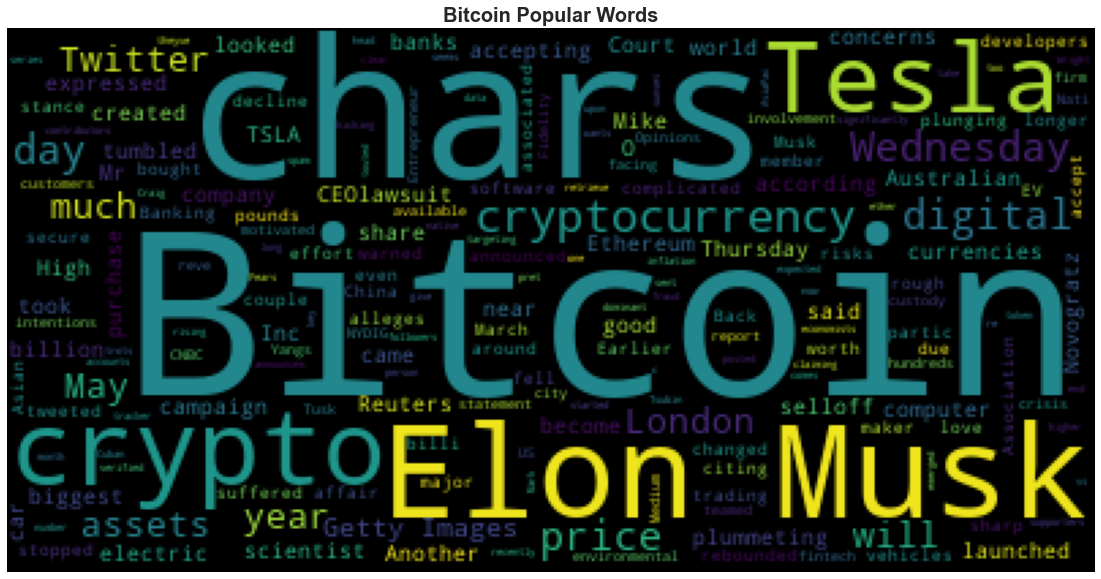

In [26]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_wc = WordCloud().generate(btc_df.text.str.cat())                  # call on Word Cloud function and generate using words from out btc_df that we pass, stripping out the text part of the DataFrame
fontdict = {'fontsize' : 20, 'fontweight' : 'bold'}                   # word cloud font options
plt.title('Bitcoin Popular Words', fontdict=fontdict)                 # apply a title and use font options         
plt.axis('off')                                                       # removes the grid of x & y axis. makes visual cleaner,
plt.imshow(btc_wc)                                                    # display the word cloud

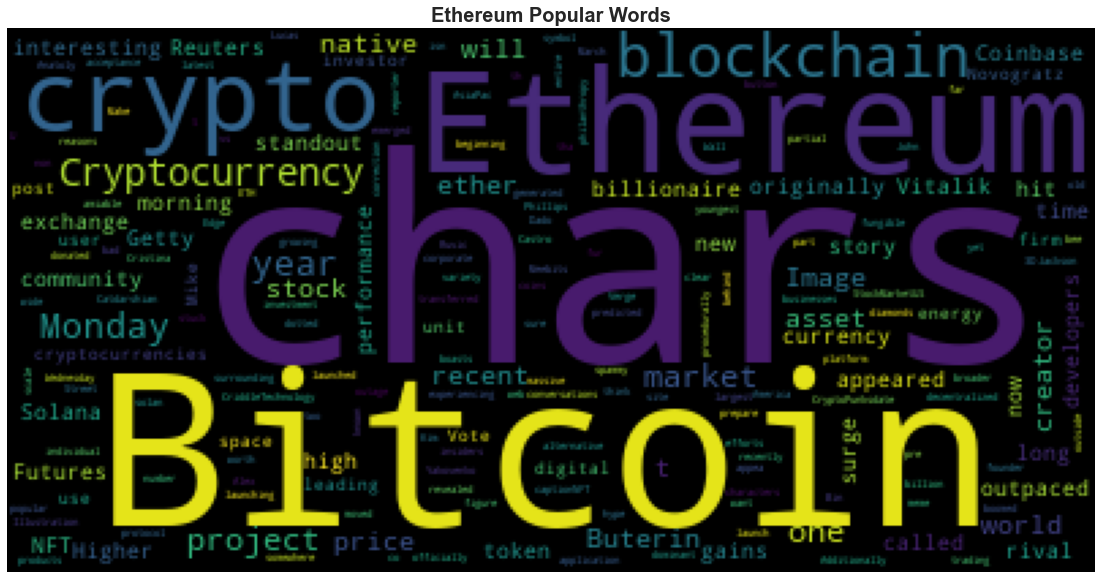

In [27]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_wc = WordCloud().generate(eth_df.text.str.cat())
fontdict = {'fontsize' : 20, 'fontweight' : 'bold'}                   
plt.title('Ethereum Popular Words', fontdict=fontdict)                          
plt.axis('off')  
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_text = btc_df.text.str.cat()       # I am going to assume all the bitcoin articles we pulled in with the newsapi will be suffice. 

In [31]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(btc_text)                                     # setting the text to be analyzed by spaCy

# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data['title'] = 'Bitcoin Recognized Entitites'

In [32]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style='ent')

In [33]:
# List all Entities
# YOUR CODE HERE!
btc_entities = []                                   # saving results of for-loop to empty list
for ent in btc_doc.ents:
    btc_entities.append(ent.text)                   # append the entity to our list. 
    print(ent.text, ent.label_)                     # print out the entity and it's label with each loop.

Elon Musk PERSON
March DATE
Musk PERSON
Tesla PERSON
Earlier this year DATE
EV ORG
1.5 MONEY
Elon Musk PERSON
Bitcoin PERSON
Bitcoin PERSON
Australian NORP
London High Court ORG
16 CARDINAL
around 4 billion pounds MONEY
about $50,000 MONEY
Asian NORP
Thursday DATE
as much as 17% PERCENT
Elon Musk PERSON
Tesla Inc PERSON
Bitcoin ORG
as much as 29% PERCENT
Wednesday DATE
the China Banking Association ORG
Elon Musk PERSON
Wednesday DATE
Tesla Inc PERSON
Medium ORG
Tusk PERSON
Yangs PERSON
hundreds CARDINAL
US GPE
this year DATE
CNBC ORG
Wednesday DATE
NYDIG ORG
Fidelity Nati PERSON
Entrepreneur ORG
Mark Cuban PERSON
Bitcoin PERSON
Elon Musk PERSON
Ethereum
 ORG
Getty Images PERSON
AsiaPac ORG
Bitcoin PERSON
Ethereum ORG
number two CARDINAL
2021 DATE
a good month DATE
May DATE
one CARDINAL
Bitcoin PERSON
May DATE
Getty Images ORG
Wednesday DATE
Bitcoin PERSON
Craig Wright PERSON
Australian NORP
$5.6 billion MONEY
London GPE
111,000 CARDINAL
Bitcoins ORG
Twitter PRODUCT
Elon Musk PERSON
Sat

In [34]:
# We can also print the list of btc_entities
print(btc_entities)

['Elon Musk', 'March', 'Musk', 'Tesla', 'Earlier this year', 'EV', '1.5', 'Elon Musk', 'Bitcoin', 'Bitcoin', 'Australian', 'London High Court', '16', 'around 4 billion pounds', 'about $50,000', 'Asian', 'Thursday', 'as much as 17%', 'Elon Musk', 'Tesla Inc', 'Bitcoin', 'as much as 29%', 'Wednesday', 'the China Banking Association', 'Elon Musk', 'Wednesday', 'Tesla Inc', 'Medium', 'Tusk', 'Yangs', 'hundreds', 'US', 'this year', 'CNBC', 'Wednesday', 'NYDIG', 'Fidelity Nati', 'Entrepreneur', 'Mark Cuban', 'Bitcoin', 'Elon Musk', 'Ethereum\r\n', 'Getty Images', 'AsiaPac', 'Bitcoin', 'Ethereum', 'number two', '2021', 'a good month', 'May', 'one', 'Bitcoin', 'May', 'Getty Images', 'Wednesday', 'Bitcoin', 'Craig Wright', 'Australian', '$5.6 billion', 'London', '111,000', 'Bitcoins', 'Twitter', 'Elon Musk', 'Saturday Ni', '30,000', 'first', 'late January', 'Bitcoin', 'this year', 'America', 'recent days', 'Elon Musk', 'Dado Ruvic', '40,0', 'Novogratz', 'Lucas Jackson', 'Reuters', 'Billionaire'

---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_text = eth_df.text.str.cat()

In [36]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(eth_text)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data['title'] = 'Ethereum Recognized Entitites'

In [37]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent')

In [38]:
# List all Entities
# YOUR CODE HERE!
eth_entities = []                               # saving results of for-lopp to empty list
for ent in eth_doc.ents:
    eth_entities.append(ent.text)               # ent is a rich object it's returning in  
    print(ent.text, ent.label_)

Vitalik Buterin PERSON
Ethereum ORG
Wednesday DATE
Ethereum ORG
$1.5 billion MONEY
Buterin PERSON
500 CARDINAL
ETH ORG
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
Anatoly Yakovenko PERSON
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
Ethereum
 ORG
Getty Images PERSON
AsiaPac ORG
Bitcoin PERSON
Ethereum ORG
number two CARDINAL
2021 DATE
CriddleTechnology ORG
Kim Catdarshian PERSON
Ethereum ORG
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Images/John Phillips ORG
27-year-old DATE
Ethereum GPE
Vitalik Buterin PERSON
350% PERCENT
Ethereum ORG
above $3,000 MONEY
Monday DATE
this year DATE
March 2020 DATE
Ruvic/Reuters
 ORG
Ethereum ORG
above $3,000 MONEY
Monday DATE
this year DATE
America GPE
Mike Novogratz PERSON
Lucas Jackson PERSON
Reuters ORG
Billionaire PERSON
Mike Novogratz PERSON
between $40,00… MONEY
a bad week DATE
Elon Musk PERSON
Bitcoins PERSON
12k 

In [39]:
print(eth_entities)

['Vitalik Buterin', 'Ethereum', 'Wednesday', 'Ethereum', '$1.5 billion', 'Buterin', '500', 'ETH', 'CryptoPunks', 'one', 'NFT', 'Meebits', '20,000', '3D', 'Anatoly Yakovenko', 'Alex Castro', 'The Verge\r\n\n \n\n Cryptocurrency', 'Coinbase', 'this morning', 'Coinbase', 'Bin', 'Ethereum\r\n', 'Getty Images', 'AsiaPac', 'Bitcoin', 'Ethereum', 'number two', '2021', 'CriddleTechnology', 'Kim Catdarshian', 'Ethereum', 'StockMarketUS Stock Futures Edge Higher', 'Monday', 'U.S.', 'Monday', 'Images/John Phillips', '27-year-old', 'Ethereum', 'Vitalik Buterin', '350%', 'Ethereum', 'above $3,000', 'Monday', 'this year', 'March 2020', 'Ruvic/Reuters\r\n', 'Ethereum', 'above $3,000', 'Monday', 'this year', 'America', 'Mike Novogratz', 'Lucas Jackson', 'Reuters', 'Billionaire', 'Mike Novogratz', 'between $40,00…', 'a bad week', 'Elon Musk', 'Bitcoins', '12k', 'Tesla', 'Bitcoin', 'Entrepreneur', 'a manic Monday', 'half a trillion dollars', 'Bitcoin', 'the kilowatt-hour', 'one', 'about 12 cents', 'rece

---